In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<Axes: xlabel='residual sugar', ylabel='Density'>

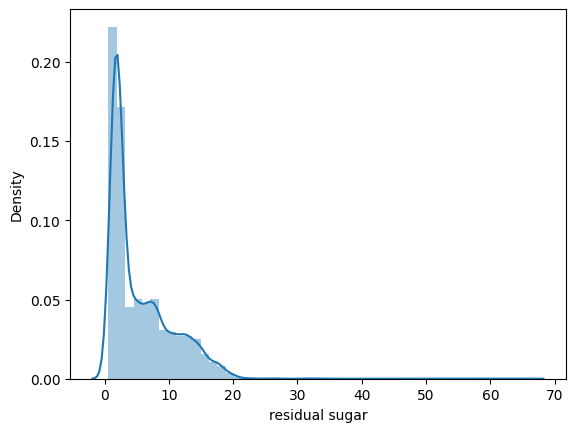

In [4]:
sns.distplot(df['residual sugar'])

<Axes: >

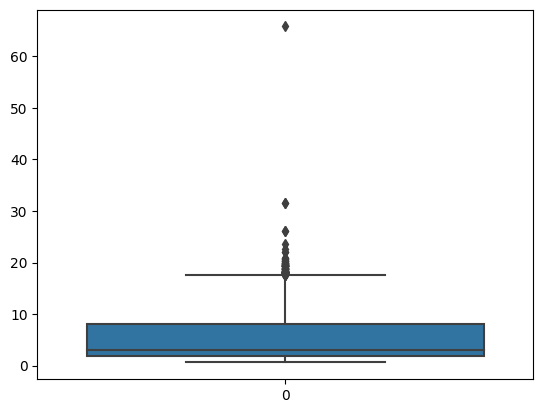

In [13]:
# to see outliers clearly
sns.boxplot(df['residual sugar'])

In [14]:
# find the limits
upper_limit = df['residual sugar'].mean() + 3*df['residual sugar'].std()
lower_limit = df['residual sugar'].mean() - 3*df['residual sugar'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 19.718700632945
lower limit: -8.830047823091265


In [15]:
# find the outliers
df.loc[(df['residual sugar'] > upper_limit) | (df['residual sugar'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
182,white,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5
191,white,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5
292,white,7.4,0.280,0.42,19.80,0.066,53.0,195.0,1.00000,2.96,0.44,9.1,5
444,white,6.9,0.240,0.36,20.80,0.031,40.0,139.0,0.99750,3.20,0.33,11.0,6
1454,white,8.3,0.210,0.49,19.80,0.054,50.0,231.0,1.00120,2.99,0.54,9.2,5
1608,white,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5
1653,white,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,white,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6


In [19]:
# trimming - delete the outlier data
new_df = df.loc[(df['residual sugar'] <= upper_limit) & (df['residual sugar'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 6497
after removing outliers: 6469
outliers: 28


In [21]:
# capping - change the outlier values to upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['residual sugar']>=upper_limit), 'residual sugar'] = upper_limit
new_df.loc[(new_df['residual sugar']<=lower_limit), 'residual sugar'] = lower_limit

<Axes: >

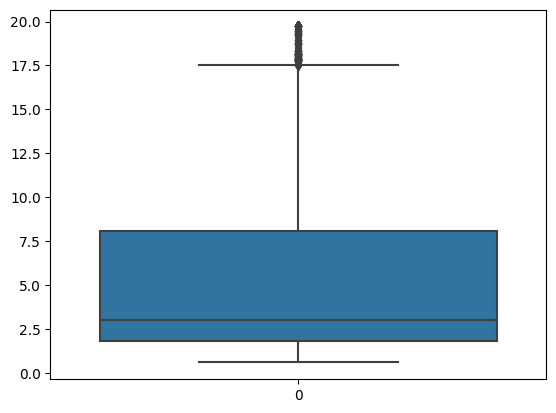

In [12]:
sns.boxplot(new_df['residual sugar'])

In [25]:
len(new_df)

6497

In [26]:
q1 = df['residual sugar'].quantile(0.25)
q3 = df['residual sugar'].quantile(0.75)
iqr = q3-q1

In [27]:
q1, q3, iqr

(1.8, 8.1, 6.3)

In [28]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-7.6499999999999995, 17.549999999999997)

<Axes: >

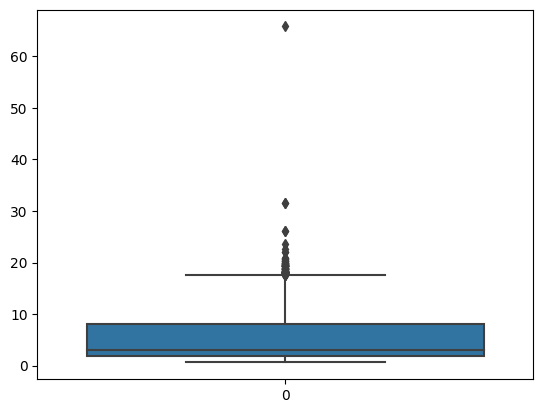

In [29]:
sns.boxplot(df['residual sugar'])

In [30]:
# find the outliers
df.loc[(df['residual sugar'] > upper_limit) | (df['residual sugar'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
14,white,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5
38,white,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5
39,white,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4691,white,6.9,0.190,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.10,7
4694,white,6.9,0.190,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.10,7
4748,white,6.1,0.340,0.24,18.35,0.050,33.0,184.0,0.99943,3.12,0.61,9.30,5
4749,white,6.2,0.350,0.25,18.40,0.051,28.0,182.0,0.99946,3.13,0.62,9.30,6


In [31]:
# trimming - delete the outlier data
new_df = df.loc[(df['residual sugar'] <= upper_limit) & (df['residual sugar'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 6497
after removing outliers: 6377
outliers: 120


In [35]:
# capping - change the outlier values to upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['residual sugar']>upper_limit), 'residual sugar'] = upper_limit
new_df.loc[(new_df['residual sugar']<lower_limit), 'residual sugar'] = lower_limit

<Axes: >

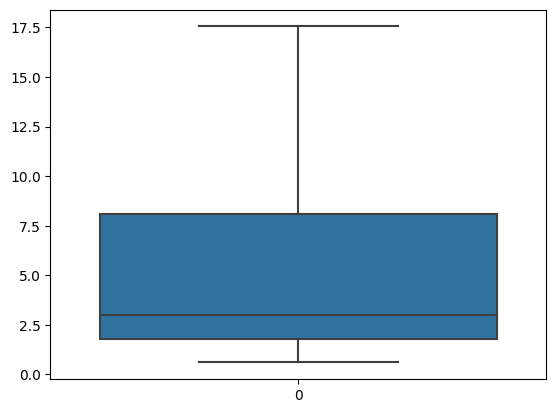

In [36]:
sns.boxplot(new_df['residual sugar'])

In [37]:
upper_limit = df['residual sugar'].quantile(0.99)
lower_limit = df['residual sugar'].quantile(0.01)
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 18.2
lower limit: 0.9


<Axes: >

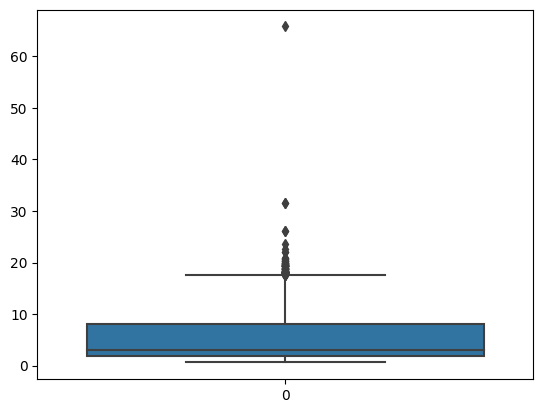

In [38]:
sns.boxplot(df['residual sugar'])

In [39]:
# find the outliers
df.loc[(df['residual sugar'] > upper_limit) | (df['residual sugar'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
14,white,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5
103,white,7.5,0.305,0.40,18.90,0.059,44.0,170.0,1.00000,2.99,0.46,9.00,5
111,white,7.2,0.270,0.46,18.75,0.052,45.0,255.0,1.00000,3.04,0.52,8.90,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,white,6.2,0.350,0.25,18.40,0.051,28.0,182.0,0.99946,3.13,0.62,9.30,6
4778,white,5.8,0.315,0.19,19.40,0.031,28.0,106.0,0.99704,2.97,0.40,10.55,6
4779,white,6.0,0.590,0.00,0.80,0.037,30.0,95.0,0.99032,3.10,0.40,10.90,4
4877,white,5.9,0.540,0.00,0.80,0.032,12.0,82.0,0.99286,3.25,0.36,8.80,5


In [40]:
# trimming - delete the outlier data
new_df = df.loc[(df['residual sugar'] <= upper_limit) & (df['residual sugar'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 6497
after removing outliers: 6398
outliers: 99


In [42]:
# capping - change the outlier values to upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['residual sugar']>upper_limit), 'residual sugar'] = upper_limit
new_df.loc[(new_df['residual sugar']<lower_limit), 'residual sugar'] = lower_limit

<Axes: >

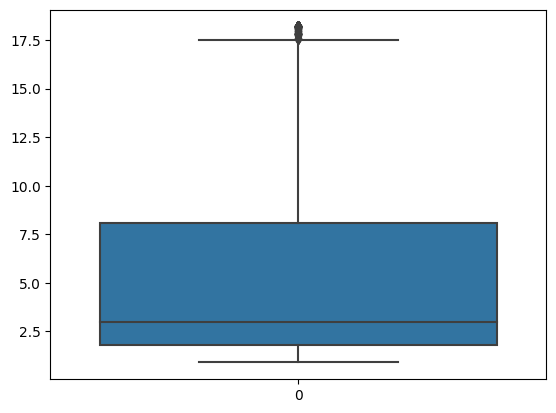

In [43]:
sns.boxplot(new_df['residual sugar'])

<Axes: xlabel='residual sugar', ylabel='Density'>

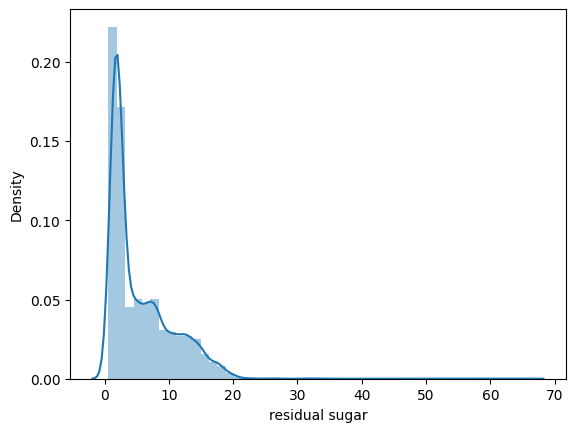

In [44]:
sns.distplot(df['residual sugar'])

<Axes: xlabel='residual sugar', ylabel='Density'>

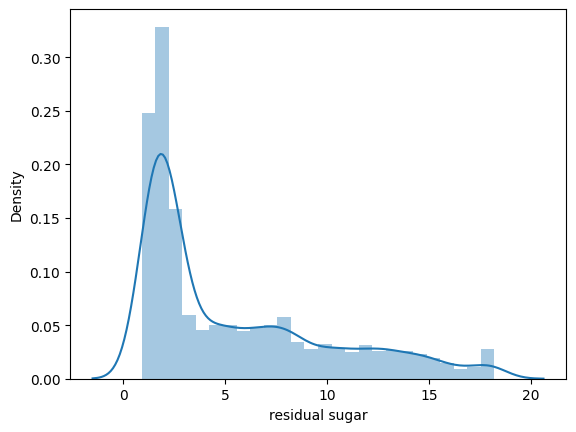

In [45]:
sns.distplot(new_df['residual sugar'])